Playground
---

List of regressors and their hyperparameters

## Linear Regressors
in `sklearn.linear_model`

#### `LinearRegression`
 * Force positive coefficients (e.g. Ordinary least squares vs. Non-Negative least squares): `positive=True`

#### `Ridge`
 * Complexity parameter $\alpha$: `alpha=.5` (defaults to 1.0)
 * Force positive coefficients: `positive=True`
 * Solver method: `solver =` ` 'auto'`, `'svd'`, `'cholesky'`, `'lsqr'`, `'sparse_cg'`, `'sag'`, `'saga'` or `'lbfgs'`

#### `RidgeCV`
 * Same as above with built-in cross validation: defaults to "leave-one-out", `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `Lasso`
 * Sparsity parameter $\alpha$: `alpha=.1` (defaults to 1.0)
 * Force positive coefficients: `positive=True`


#### `LassoCV`
 * Same as above with built-in cross validation: default 5-fold cross-validation, `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `LassoLars`
 * Lasso with Least Angle Regression 

#### `LassoLarsCV`
 * Same as above with built-in cross validation: default 5-fold cross-validation, `cv=10` triggers 10-fold `GridSearchCV` 
 
#### `LassoLarsIC`
* `Lasso` with information-criteria based model selection

#### `MultiTaskLasso`
* `Lasso` with y being a 2D array, of shape (n_samples, n_tasks)

#### `ElasticNet` & `ElasticNetCV`
* ...

#### `MultiTaskElasticNet` & `MultiTaskElasticNetCV`
* ...
* `ElasticNet` with y being a 2D array, of shape (n_samples, n_tasks)

#### `OrthogonalMatchingPursuit`
* ...

#### `BayesianRidge`
* ...

#### `ARDRegression` (Automatic Relevance Determination)
* ...

#### `TweedieRegressor` (GenLins)
* `power`, `alpha`, `link=` z.B. `'log'`
* `power = 1` equivalent to `PoissonRegressor`
* `power = 2` equivalent to `GammaRegressor`
* `power = 3` Inverse Gaussian distribution.

#### `SGDRegressor`
* ...

#### `Perceptron`
* ...

#### `PassiveAggressiveRegressor`
* ...

#### `HuberRegressor` & `TheilSenRegressor` & `RANSACRegressor`
* ...

#### `QuantileRegressor`
* ...

#### `PolynomialFeatures`
* ...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, scale
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import Ridge, Lasso, LassoLars, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from get_data import get_data, get_housing_data

import warnings # supress warnings
warnings.filterwarnings('ignore')

# mindfulness dataset
#X,y = get_data()
#data = pd.merge(X,y,left_index = True, right_index = True)
#y_label = "audit"

X,y = get_housing_data()

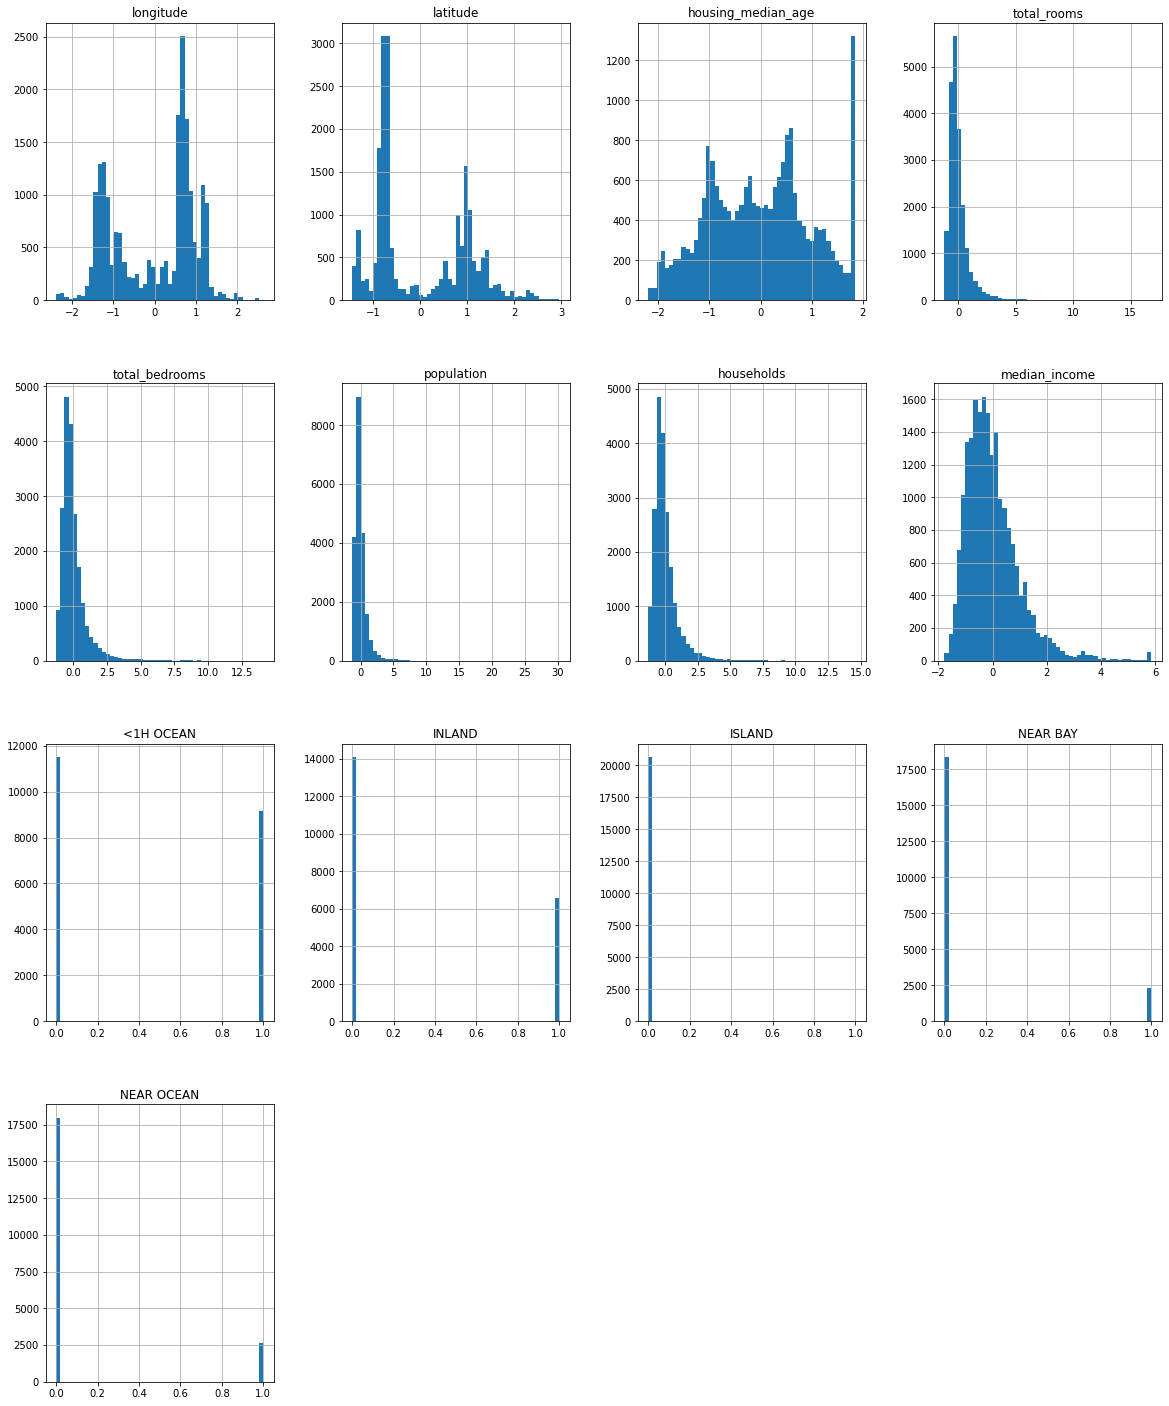

In [4]:
X.hist(bins=50, figsize=(20,25))
plt.show()

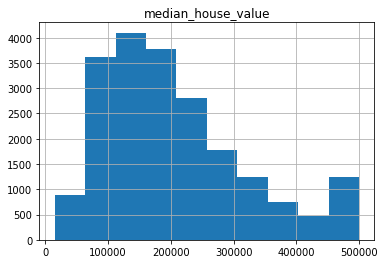

In [7]:
y.hist();

In [9]:
# features with highest correlations (abs. correlations!)
np.abs(X.join(y).corr()[y.columns[0]]).sort_values(ascending=False)[1:]

median_income         0.688075
INLAND                0.484859
<1H OCEAN             0.256617
NEAR BAY              0.160284
latitude              0.144160
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
longitude             0.045967
population            0.024650
ISLAND                0.023416
Name: median_house_value, dtype: float64

In [47]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from get_data import get_data, get_housing_data
from utils import split_train_test
import pandas as pd

import time

In [57]:
%%time

X, y = get_housing_data()

hps = [0, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
hp_name = 'alpha'

# main cv splitter
cv = GroupShuffleSplit(
    n_splits=5,
    test_size=0.2,
    random_state=0)

# df to collect MSEs of all iterations
results = pd.DataFrame(np.empty((len(hps),cv.n_splits)))

# Iterate over main splitter
for i_cv, (i_train, i_test) in enumerate(cv.split(X, y, groups=X.index)):

    y_train, y_test = split_train_test(y, i_train, i_test)
    X_train, X_test = split_train_test(X, i_train, i_test)

    print(f"Split {i_cv}")

    cv_hp = GroupShuffleSplit(
        n_splits=len(hps),
        test_size=0.2,
        random_state=0)

    
    # iterate over all models
    for j_mod, (j_train, j_test) in enumerate(cv_hp.split(X_train, y_train, groups=X_train.index)):
        
        y_train_hp, y_test_hp = split_train_test(y_train, j_train, j_test)
        X_train_hp, X_test_hp = split_train_test(X_train, j_train, j_test)
        
        hp = hps[j_mod]
        
        m = Ridge(alpha=hp)
        
        m.fit(X_train_hp, y_train_hp)
        y_test_hp_pred = m.predict(X_test_hp)
        mse = mean_squared_error(y_test_hp, y_test_hp_pred)
        
        results.iloc[j_mod,i_cv] = mse
        
        print(f"{hp_name}={hp}: mse={mse:.2f}")

    print("\n")
    
best_model = np.argmin(results.T.mean())



Split 0
alpha=0: mse=4820948511.13
alpha=1.0: mse=4964135468.19
alpha=10.0: mse=4582016924.71
alpha=100.0: mse=4816921556.02
alpha=1000.0: mse=4787455150.61
alpha=10000.0: mse=6601698668.71
alpha=100000.0: mse=11628718063.65
alpha=1000000.0: mse=13496557886.92


Split 1
alpha=0: mse=309481792824491985201108092977152.00
alpha=1.0: mse=4875575654.69
alpha=10.0: mse=4736993502.54
alpha=100.0: mse=4897583115.22
alpha=1000.0: mse=5300915166.25
alpha=10000.0: mse=6884525943.35
alpha=100000.0: mse=11868468699.64
alpha=1000000.0: mse=12978310365.39


Split 2
alpha=0: mse=4671774713.38
alpha=1.0: mse=4875070508.97
alpha=10.0: mse=4892087881.47
alpha=100.0: mse=4825919236.48
alpha=1000.0: mse=4821048440.30
alpha=10000.0: mse=6807549642.29
alpha=100000.0: mse=11990730122.32
alpha=1000000.0: mse=12658668157.72


Split 3
alpha=0: mse=4763191017.67
alpha=1.0: mse=5051158301.39
alpha=10.0: mse=4879340652.70
alpha=100.0: mse=4889873188.32


/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.43579e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.03769e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


alpha=1000.0: mse=5026875876.69
alpha=10000.0: mse=6761188049.91
alpha=100000.0: mse=12272055038.56
alpha=1000000.0: mse=12929032740.75


Split 4
alpha=0: mse=4481759050.81
alpha=1.0: mse=4796966817.31
alpha=10.0: mse=4838514242.18
alpha=100.0: mse=4801206250.73
alpha=1000.0: mse=4783509868.46
alpha=10000.0: mse=6770753283.91
alpha=100000.0: mse=11666839831.96
alpha=1000000.0: mse=12869563274.01


CPU times: user 2.9 s, sys: 3.76 s, total: 6.66 s
Wall time: 935 ms


**Plot LinearRegression**

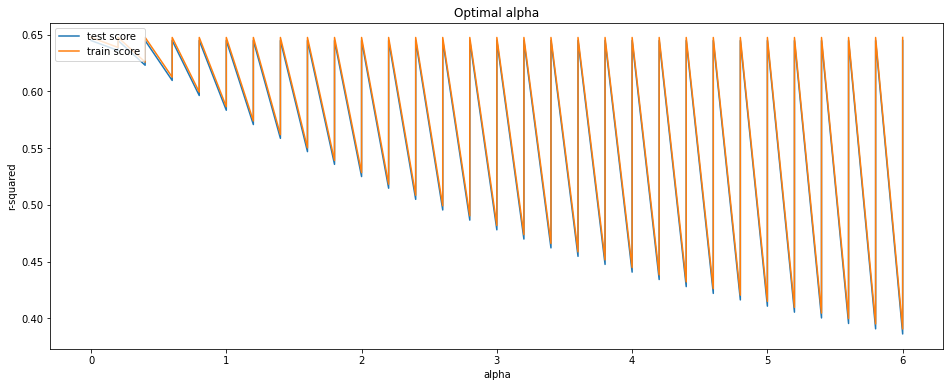

In [297]:
hp_to_plot="alpha"

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_" + hp_to_plot], cv_results["mean_test_score"])
plt.plot(cv_results["param_" + hp_to_plot], cv_results["mean_train_score"])
plt.xlabel(hp_to_plot)
plt.ylabel('r-squared')
plt.title("Optimal " + hp_to_plot)
plt.legend(['test score', 'train score'], loc='upper left')

In [157]:
# final model
alpha = 0.6
l1_ratio = 1

lin_reg = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
lin_reg.fit(X_train, y_train)


# predict X_test
y_pred = lin_reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6637183423818207


**RandomForest**

In [170]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# step-2: specify range of hyperparameters to tune
hyper_params = {"criterion": ["squared_error", "absolute_error", "poisson"],"n_estimators":[10,20,50,100,200,500]}


# step-3: perform grid search
# 3.1 specify model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

print("Score train: ",rf_reg.score(X_train,y_train))
print("Score test:  ",rf_reg.score(X_test,y_test))

Score train:  0.9511111762499406
Score test:   0.5901294979252275


In [171]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rf_reg, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [172]:
print(model_cv.best_estimator_,"=>",model_cv.best_score_)

RandomForestRegressor(criterion='absolute_error', n_estimators=20) => 0.6225883745313235


In [176]:
# final model
criterion = "absolute_error"
n_estimators = 20

rf_reg = RandomForestRegressor(n_estimators=n_estimators,criterion=criterion)
rf_reg.fit(X_train, y_train)


# predict X_test
y_pred = rf_reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6108154779093546
